In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
plt.style.use('ggplot')


In [145]:
ad_marital_status = pd.read_excel ('Data/AD-by-marital-status.xls')

In [205]:
ad_marital_status.head(21)

,Pay Grade,Single Male,Single Female,Single Total,Single Parent Male,Single Parent Female,Single Parent Total,Joint Service Marriage Male,Joint Service Marriage Female,Joint Service Marriage Total,Civilian Married Male,Civilian Married Female,Civilian Married Total,Total Male,Total Female,Grand Total
0,E-1,31229,5717,36946,563,122,685,139,141,280,5060,719,5779,36991,6699,43690
1,E-2,53094,8388,61482,1457,275,1732,438,579,1017,12483,1682,14165,67472,10924,78396
2,E-3,131091,21019,152110,4264,1920,6184,3579,4902,8481,54795,6641,61436,193729,34482,228211
3,E-4,112710,16381,129091,9491,4662,14153,8661,9778,18439,105556,9961,115517,236418,40782,277200
4,E-5,57989,11021,69010,10937,6576,17513,12459,11117,23576,130944,8592,139536,212329,37306,249635
5,E-6,19125,4654,23779,10369,4962,15331,8474,6961,15435,110322,5827,116149,148290,22404,170694
6,E-7,5446,1913,7359,6530,2585,9115,5065,3291,8356,70001,3206,73207,87042,10995,98037
7,E-8,1009,438,1447,1786,513,2299,1423,651,2074,21079,820,21899,25297,2422,27719
8,E-9,381,202,583,579,144,723,458,150,608,8215,291,8506,9633,787,10420
9,TOTAL ENLISTED,412074,69733,481807,45976,21759,67735,40696,37570,78266,518455,37739,556194,1017201,166801,1184002


In [137]:
enlisted_df = ad_marital_status[:9]

In [138]:
officer_df = ad_marital_status[10:21]

In [7]:
warrant_df = ad_marital_status[21:27]

In [167]:
enlisted_df.head()

,Pay Grade,Single Male,Single Female,Single Total,Single Parent Male,Single Parent Female,Single Parent Total,Joint Service Marriage Male,Joint Service Marriage Female,Joint Service Marriage Total,Civilian Married Male,Civilian Married Female,Civilian Married Total,Total Male,Total Female,Grand Total
0,E-1,31229,5717,36946,563,122,685,139,141,280,5060,719,5779,36991,6699,43690
1,E-2,53094,8388,61482,1457,275,1732,438,579,1017,12483,1682,14165,67472,10924,78396
2,E-3,131091,21019,152110,4264,1920,6184,3579,4902,8481,54795,6641,61436,193729,34482,228211
3,E-4,112710,16381,129091,9491,4662,14153,8661,9778,18439,105556,9961,115517,236418,40782,277200
4,E-5,57989,11021,69010,10937,6576,17513,12459,11117,23576,130944,8592,139536,212329,37306,249635


In [9]:
enlisted_df2 = enlisted_df.drop(columns=['Single Total', 'Joint Service Marriage Total', 'Single Parent Total', 'Civilian Married Total', 'Grand Total','Total Male', 'Total Female'])

In [11]:
enlisted_df3 = enlisted_df.drop(columns=['Single Male', 'Single Female', 'Joint Service Marriage Male', 'Joint Service Marriage Female','Single Parent Male','Single Parent Female', 'Civilian Married Male','Civilian Married Female', 'Grand Total','Total Male', 'Total Female'])

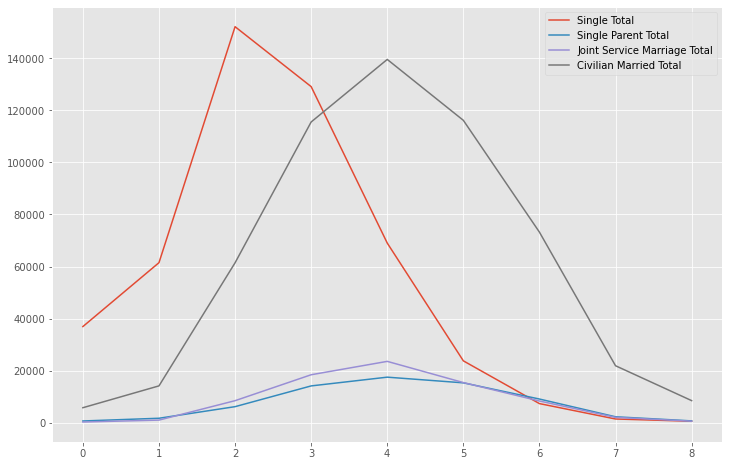

In [127]:
enlisted_df3.plot(figsize=(12,8))
enlisted_df3;

In [71]:
x = enlisted_df3['Pay Grade']
single_total= enlisted_df3['Single Total']
single_parent_total = enlisted_df3['Single Parent Total']
joint_service_marriage_total= enlisted_df3['Joint Service Marriage Total']
civilian_married_total = enlisted_df3['Civilian Married Total']

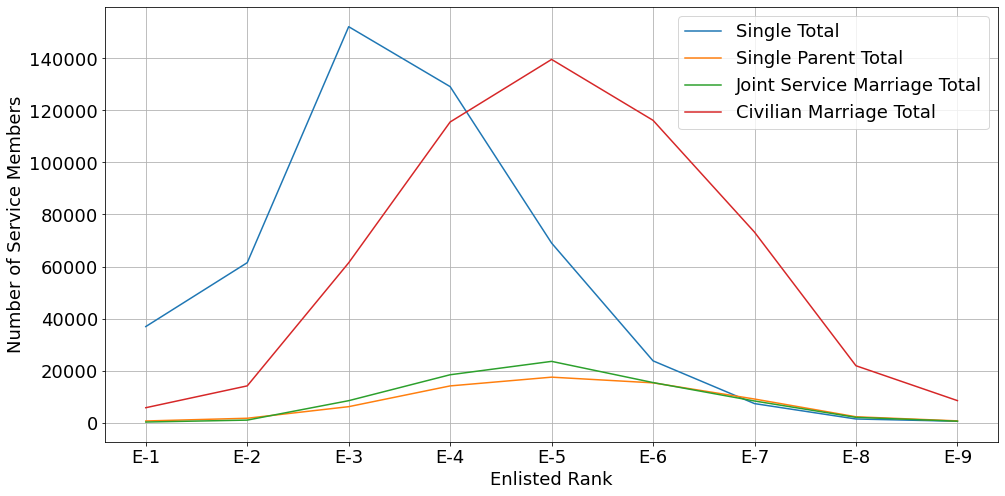

In [72]:
fig, ax = plt.subplots(figsize=(16,8)) 
ax.plot(x, single_total, label = 'Single Total') 
ax.plot(x, single_parent_total,label = 'Single Parent Total')
ax.plot(x, joint_service_marriage_total,label = 'Joint Service Marriage Total')
ax.plot(x,civilian_married_total ,label = 'Civilian Marriage Total')
plt.legend(loc="upper right")
plt.xlabel('Enlisted Rank')
plt.ylabel('Number of Service Members')
plt.rcParams.update({'font.size': 18})
plt.grid()

In [111]:
officer_df = ad_marital_status[10:20]
officer_df3 = officer_df.drop(columns=['Single Male', 'Single Female', 'Joint Service Marriage Male', 'Joint Service Marriage Female','Single Parent Male','Single Parent Female', 'Civilian Married Male','Civilian Married Female', 'Grand Total','Total Male', 'Total Female'])
single_total= officer_df3['Single Total'].values
single_parent_total = officer_df3['Single Parent Total'].values
joint_service_marriage_total= officer_df3['Joint Service Marriage Total'].values
civilian_married_total = officer_df3['Civilian Married Total'].values

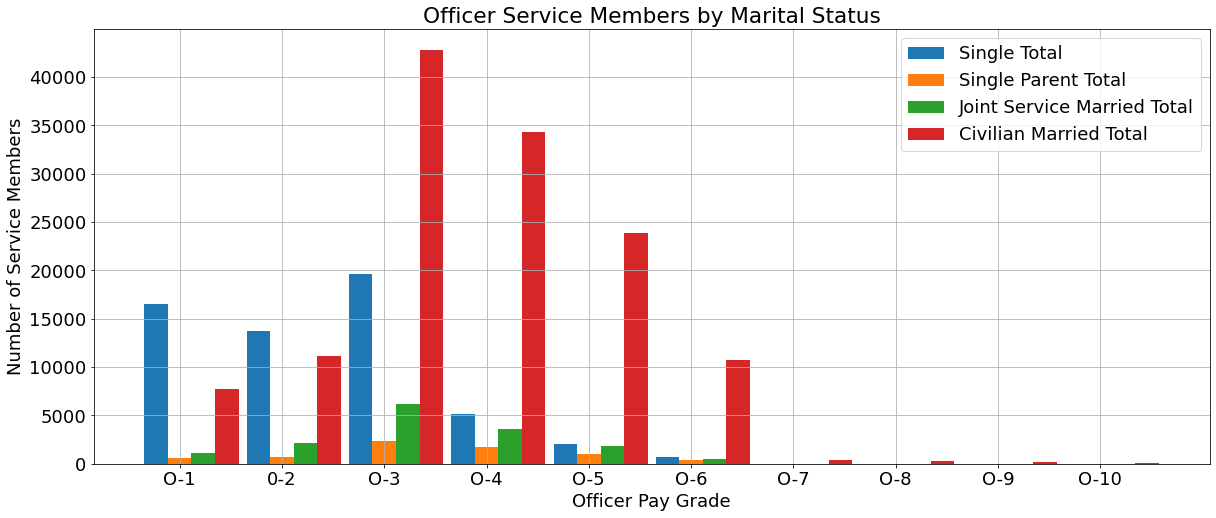

In [112]:
labels= ['O-1','0-2','O-3','O-4','O-5','O-6','O-7','O-8', 'O-9', 'O-10']

x=np.arange(len(labels))
width = 0.23

fig, ax = plt.subplots(figsize=(20,8)) 
rects1 = ax.bar(x, single_total ,width, label='Single Total')
rects2 = ax.bar(x+width, single_parent_total ,width, label='Single Parent Total')
rects3 = ax.bar(x+2*width, joint_service_marriage_total ,width, label='Joint Service Married Total')
ects4 = ax.bar(x+3*width, civilian_married_total ,width, label='Civilian Married Total')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
plt.xticks(x+width, labels)
plt.legend(loc="upper right")
plt.title('Officer Service Members by Marital Status')
plt.xlabel('Officer Pay Grade')
plt.ylabel('Number of Service Members')
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()



In [123]:
enlisted_df3 = enlisted_df.drop(columns=['Single Male', 'Single Female', 'Joint Service Marriage Male', 'Joint Service Marriage Female','Single Parent Male','Single Parent Female', 'Civilian Married Male','Civilian Married Female', 'Grand Total','Total Male', 'Total Female'])
single_total2= enlisted_df3['Single Total'].values
single_parent_total2 = enlisted_df3['Single Parent Total'].values
joint_service_marriage_total2= enlisted_df3['Joint Service Marriage Total'].values
civilian_married_total2 = enlisted_df3['Civilian Married Total'].values

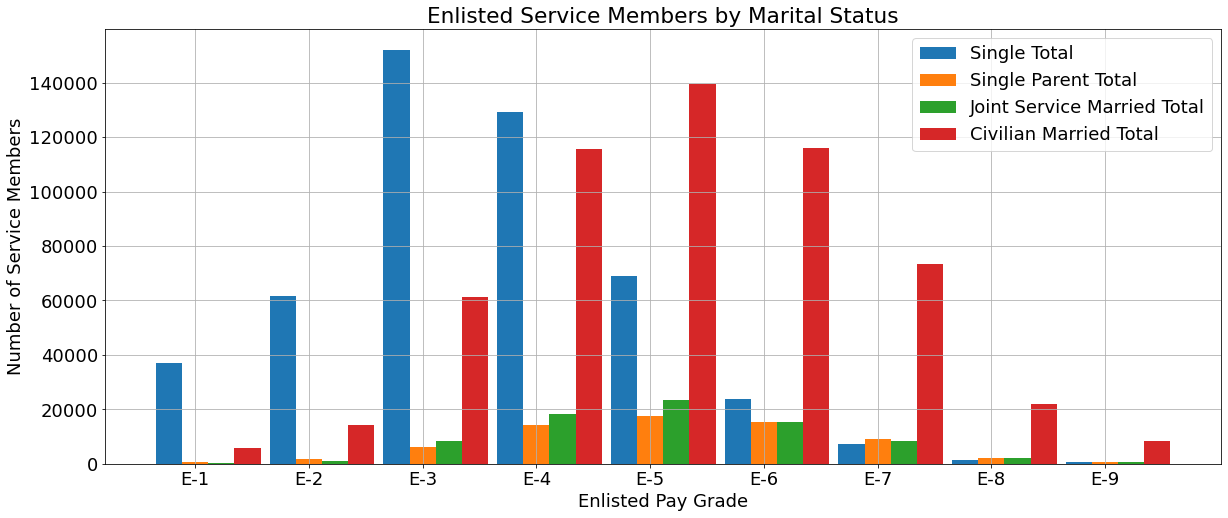

In [124]:
labels= ['E-1','E-2','E-3','E-4','E-5','E-6','E-7','E-8', 'E-9']

x=np.arange(len(labels))
width = 0.23

fig, ax = plt.subplots(figsize=(20,8)) 
rects1 = ax.bar(x, single_total2 ,width, label='Single Total')
rects2 = ax.bar(x+width, single_parent_total2 ,width, label='Single Parent Total')
rects3 = ax.bar(x+2*width, joint_service_marriage_total2 ,width, label='Joint Service Married Total')
ects4 = ax.bar(x+3*width, civilian_married_total2 ,width, label='Civilian Married Total')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
plt.xticks(x+width, labels)
plt.legend(loc="upper right")
plt.title('Enlisted Service Members by Marital Status')
plt.xlabel('Enlisted Pay Grade')
plt.ylabel('Number of Service Members')
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()


In [253]:
enlisted_df.set_index('Pay Grade')
df = enlisted_df.set_index('Pay Grade')
df['Total Married'] = enlisted_df['Joint Service Marriage Total'].values + enlisted_df['Civilian Married Total'].values
married_enlisted =df['Total Married'].values

officer_df.set_index('Pay Grade')
df2 = officer_df.set_index('Pay Grade')
df2['Total Married'] = officer_df['Joint Service Marriage Total'].values + officer_df['Civilian Married Total'].values
married_officers =df2['Total Married'].values




array([  6059,  15182,  69917, 133956, 163112, 131584,  81563,  23973,
         9114])

In [254]:
ad_marital_index = ad_marital_status.set_index('Pay Grade')

js_married_e = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Joint Service Marriage Total'].values)
civ_married_e = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Civilian Married Total'].values)
total_e = int(ad_marital_index.loc[['TOTAL ENLISTED'],'Grand Total'].values)
enlisted_married = int(js_married_e) + int(civ_married_e)

In [255]:
married_mean_e = enlisted_married/total_e
enlisted_married_e

634460

In [256]:
ad_marital_index = ad_marital_status.set_index('Pay Grade')

js_married_o = int(ad_marital_index.loc[['TOTAL OFFICER'],'Joint Service Marriage Total'].values)
civ_married_o = int(ad_marital_index.loc[['TOTAL OFFICER'],'Civilian Married Total'].values)
total_o = int(ad_marital_index.loc[['TOTAL OFFICER'],'Grand Total'].values)
officer_married = int(js_married_o) + int(civ_married_o)

In [257]:
married_mean_o = officer_married/total_o

In [258]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + \
                        (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [260]:
test_statistic = welch_test_statistic(married_enlisted, married_officers)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: 1.92


In [261]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [262]:
df = welch_satterhwaithe_df(married_enlisted, married_officers)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

Degrees of Freedom for Welch's Test: 14.15


In [265]:
students = stats.t(df)
p_value = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))
print("p-value  {:2.2f}".format(p_value))

p-value  1.92


In [267]:
test_statistic = welch_test_statistic(married_enlisted, married_officers)

p_value = 1 - students.cdf(test_statistic)
print("p-value for enlisted average marriage greater than officers : {:2.3f}".format(p_value))

p-value for enlisted average marriage greater than officers : 0.038
